# Put Together Current Progress

In [1]:
# Load Library
import numpy as np
from isens_vtrigU import isens_vtrigU 
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import proj3d
from scipy.constants import c
from scipy.signal import find_peaks
from scipy.io import savemat
from mpl_toolkits.mplot3d import Axes3D


## Angle FFT

In [5]:
# Load Data
current_case = 'test01242023'
current_scenario = 'cf_y_angle_0'
my_vtrig = isens_vtrigU(case=current_case)
calArr, recArr = my_vtrig.load_data(case=current_case, scenario=current_scenario)

# Parameter Setup
nframe = recArr.shape[0]
chosen_frame = 40
y_offset_shift = -232
x_offset_shift = 100

# Background Substraction
proArr = my_vtrig.calibration(calArr,recArr,method=0)

# Compute the Range Profile and Find the Target Range Bin (For one target)
range_profile = my_vtrig.range_pipeline(current_case,current_scenario, plot=False)[50,:]
target_range_bin = np.argmax(range_profile)
range_bins = [target_range_bin-1, target_range_bin, target_range_bin+1]
print(f'{my_vtrig.dist_vec[target_range_bin]} [m]')

# Generate the 3D map
tof = np.fft.ifft(proArr,n=512,axis=2)                      # Do IFFT across frequency steps to get the range bins
tof[:,:,np.where(my_vtrig.dist_vec>3)] = np.mean(tof)       # Eliminate noise that is beyond the range
tof = tof.reshape(nframe,20,20,-1)[chosen_frame,:,:,:]      # Reshape the range profile to Tx x Rx and extract a frame
# tof = np.linalg.norm(tof,axis=0)
tof = np.fft.fft(tof,n=512,axis=1)
tof = np.roll(tof,shift=-y_offset_shift,axis=1)
tof = np.fft.fft(tof,n=512,axis=0)
tof = np.roll(tof,shift=-x_offset_shift,axis=1)
# new shape: (AoD, AoA, Range) = (x, y, z)

Freq Points: 150 
TxRxPairs Shape: (400, 2)
Nfft = 512
Number of Recorded Frames: 100

Current scenario: cf_y_angle_0

calArr Shape: (10, 400, 150)
recArr Shape: (100, 400, 150)

recArr Channels: (frame, Tx*Rx, freqs)

Current scenario: cf_y_angle_0

calArr Shape: (10, 400, 150)
recArr Shape: (100, 400, 150)

recArr Channels: (frame, Tx*Rx, freqs)

1.1279440235118323 [m]


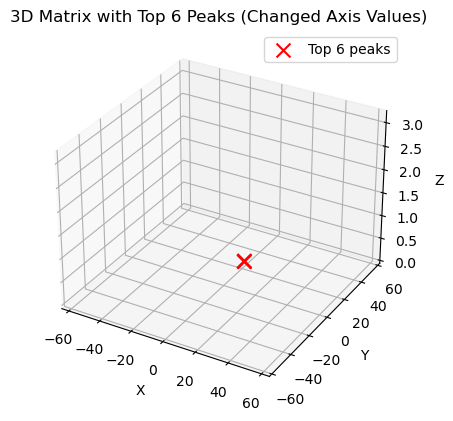

In [12]:
# Example 3D matrix (replace this with your matrix)
matrix = tof

# Arrays to change the axis values (replace these with your arrays)
x_ratio = 40/58
y_ratio = 20/30
x_array = (my_vtrig.angle_vec-90)*x_ratio
y_array = (my_vtrig.angle_vec-90)*y_ratio
z_array = my_vtrig.dist_vec

# Find the indices of the top 6 largest values
flat_indices = np.argsort(matrix.flatten())[::-1][:6]
indices_3d = np.unravel_index(flat_indices, matrix.shape)

# Extract x, y, and z coordinates of the top 6 peaks
x_peaks, y_peaks, z_peaks = indices_3d

# Create a 3D scatter plot for the original matrix
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Get x, y, z indices for the entire matrix
x, y, z = np.indices(matrix.shape)
# x = x[0::2]
# y = y[0::2]
# z = z[0::2]

# Add the entire matrix as blue points with changed axis values
# ax.scatter(x_array[x], y_array[y], z_array[z], c='b', alpha=0.3, label='Original matrix')

# Add the top 6 peaks to the plot with changed axis values
ax.scatter(x_array[x_peaks], y_array[y_peaks], z_array[z_peaks], c='r', marker='x', s=100, label='Top 6 peaks')

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot title
plt.title("3D Matrix with Top 6 Peaks (Changed Axis Values)")

# Set the axis limits to match the ranges of x_array, y_array, and z_array
ax.set_xlim(x_array.min(), x_array.max())
ax.set_ylim(y_array.min(), y_array.max())
ax.set_zlim(z_array.min(), z_array.max())

# Add legend
ax.legend()

# Show the plot
# plt.show()

In [15]:
print(y_peaks)

[167 168 166 165 169 166]


Freq Points: 150 
TxRxPairs Shape: (400, 2)
Nfft = 512
Number of Recorded Frames: 100

Current scenario: 2cf_yy_angle_+-20

calArr Shape: (10, 400, 150)
recArr Shape: (100, 400, 150)

recArr Channels: (frame, Tx*Rx, freqs)

Current scenario: 2cf_yy_angle_+-20

calArr Shape: (10, 400, 150)
recArr Shape: (100, 400, 150)

recArr Channels: (frame, Tx*Rx, freqs)



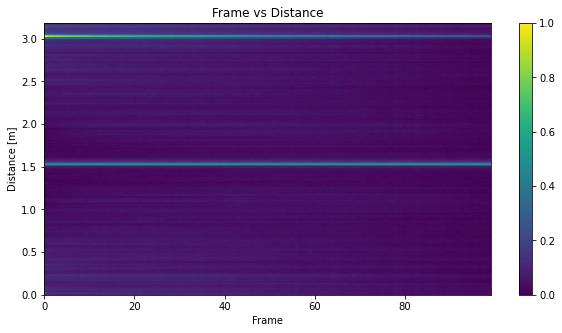

1.5330067943862473 [m]
-232
-58.590998043052835
Top 6 peak indices: [173 349  99 428 464 492]
Top 6 peak angles: [-19.37377691  21.95694716 -36.75146771  40.50880626  48.962818
  55.53816047]


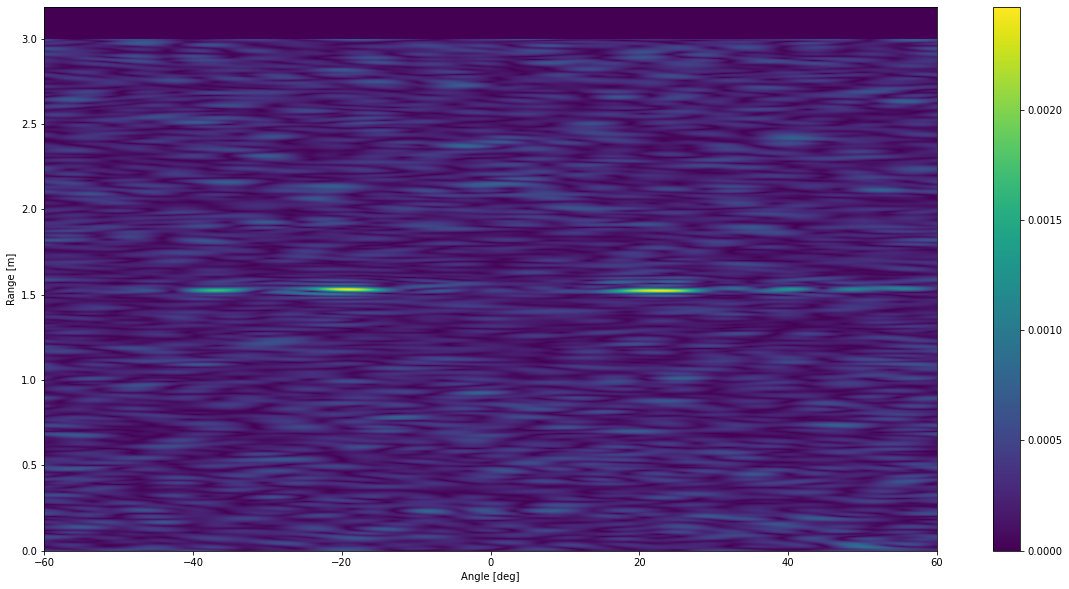

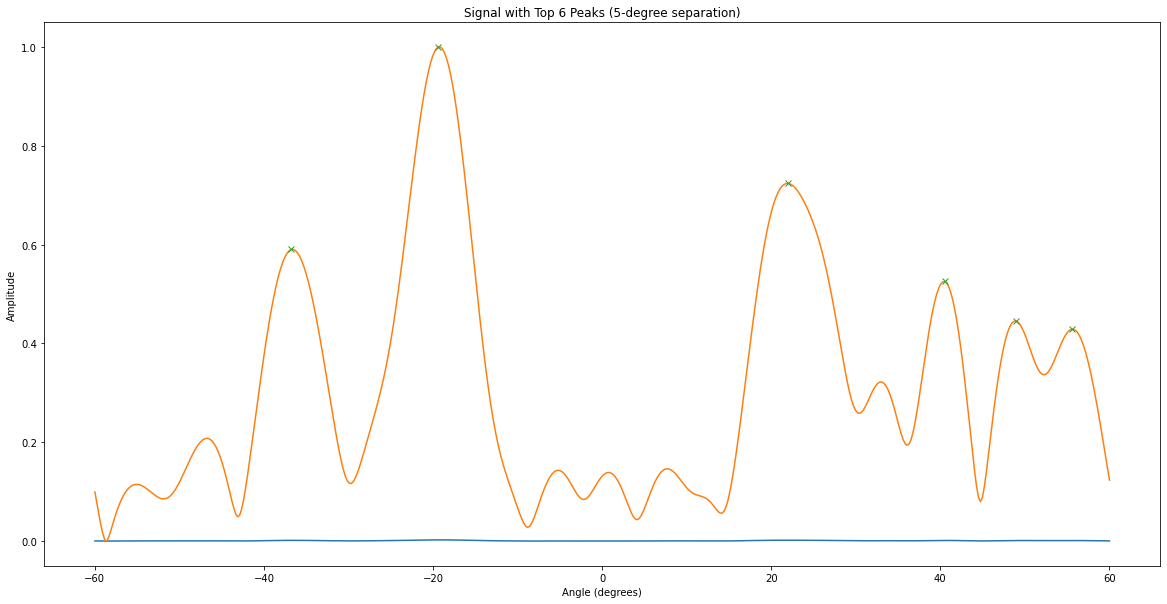

In [17]:
# AoA
# current_case = 'test04102023'
# current_case = 'test01162023'
# current_scenario = 'cf_move_yy'
# current_scenario = 'cf_y_angle_+20'
current_case = 'test01312023'
current_scenario = '2cf_yy_angle_+-20'
my_vtrig = isens_vtrigU(case=current_case)
calArr, recArr = my_vtrig.load_data(case=current_case, scenario=current_scenario)
proArr = my_vtrig.calibration(calArr,recArr,method=0)
nframe = proArr.shape[0]

chosen_frame = 50

range_profile = my_vtrig.range_pipeline(current_case,current_scenario, plot=True)[50,:]
target_range_bin = np.argmax(range_profile)
range_bins = [target_range_bin-1, target_range_bin, target_range_bin+1]
print(f'{my_vtrig.dist_vec[target_range_bin]} [m]')


tof = np.fft.ifft(proArr,n=512,axis=2)
tof[:,:,np.where(my_vtrig.dist_vec>3)] = np.mean(tof)
tof = tof.reshape(nframe,20,20,-1)[chosen_frame,10,:,:]
# tof = np.linalg.norm(tof,axis=0)
tof = np.fft.fft(tof,n=512,axis=0)
# print(tof[:,:,target_range_bin])
plt.figure(figsize=(20,10))
ratio = 20/30
extent = [(np.min(my_vtrig.angle_vec)-90)*ratio,(np.max(my_vtrig.angle_vec)-90)*ratio,np.min(my_vtrig.dist_vec),np.max(my_vtrig.dist_vec)]
tof = tof.T
tof = np.abs(tof)
# y_offset_shift = np.argmin(tof[target_range_bin,:])-256 + 10
y_offset_shift = -232
print(y_offset_shift)
tof = np.roll(tof,shift=-y_offset_shift,axis=1)
# tof[target_range_bin,:] = tof[target_range_bin,:] * 10000
plt.imshow(tof,origin='lower',aspect='auto',extent=extent)
plt.colorbar()
plt.xlabel('Angle [deg]')
plt.ylabel('Range [m]')
print((my_vtrig.angle_vec[np.argmin(tof[target_range_bin,:])]-90)*ratio)
plt.figure(figsize=(20,10))
plt.plot((my_vtrig.angle_vec-90)*ratio, tof[target_range_bin,:])




# Find peaks
signal = tof[target_range_bin,:]
signal = my_vtrig.normalization(signal)
angles = (my_vtrig.angle_vec-90)*ratio
# Calculate the minimum number of samples for a 5-degree separation
degree_separation = 5
samples_per_degree = len(angles) / (np.max(angles) - np.min(angles))
min_samples_between_peaks = int(degree_separation * samples_per_degree)

# Find peaks with the required distance
peaks, _ = find_peaks(signal, distance=min_samples_between_peaks)

# Sort the peaks by their amplitudes in descending order and select the first 6 peaks
sorted_peak_indices = np.argsort(signal[peaks])[::-1][:6]
top_6_peaks = peaks[sorted_peak_indices]

# Print the indices and angles of the top 6 peaks
print("Top 6 peak indices:", top_6_peaks)
print("Top 6 peak angles:", angles[top_6_peaks])

# Plot the signal with the top 6 peaks
plt.plot(angles, signal)
plt.plot(angles[top_6_peaks], signal[top_6_peaks], "x")
plt.title("Signal with Top 6 Peaks (5-degree separation)")
plt.xlabel("Angle (degrees)")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
# AoD
current_case = 'test01242023'
current_scenario = 'cf_x_angle_+20'
# current_scenario = 'human_longer'
my_vtrig = isens_vtrigU(case=current_case)
calArr, recArr = my_vtrig.load_data(case=current_case, scenario=current_scenario)
proArr = my_vtrig.calibration(calArr,recArr,method=0)
nframe = proArr.shape[0]

range_profile = my_vtrig.range_pipeline(current_case,current_scenario, plot=True)[50,:]
target_range_bin = np.argmax(range_profile)
range_bins = [target_range_bin-1, target_range_bin, target_range_bin+1]
print(f'{my_vtrig.dist_vec[target_range_bin]} [m]')


tof = np.fft.ifft(proArr,n=512,axis=2)
tof[:,:,np.where(my_vtrig.dist_vec>3)] = np.mean(tof)
tof = tof.reshape(nframe,20,20,-1)[50,:,10,:]
tof = np.squeeze(tof)
tof = np.fft.fft(tof,n=512,axis=0)
# print(tof[:,:,target_range_bin])
plt.figure(figsize=(20,10))

tof = tof.T
# x_offset_shift = np.argmin(tof[np.where(tof==np.max(tof))[0],:])-256 + 14
x_offset_shift = 100
print(x_offset_shift)
tof = np.roll(tof,shift=-x_offset_shift,axis=1)
# ratio = 40/50.4
ratio = 40/58
extent = [(np.min(my_vtrig.angle_vec)-90)*ratio,(np.max(my_vtrig.angle_vec)-90)*ratio,np.min(my_vtrig.dist_vec),np.max(my_vtrig.dist_vec)]
plt.imshow(np.abs(tof),origin='lower',aspect='auto',extent=extent)
plt.colorbar()
plt.xlabel('Angle [deg]')
plt.ylabel('Range [m]')
# print(my_vtrig.angle_vec[np.argmin(tof[np.where(tof==np.max(tof))[0],:])]-90)
# (range x angle)
# print(np.where(tof==np.max(tof)))
print((my_vtrig.angle_vec[np.argmax(tof[target_range_bin,:])]-90)*ratio)

Freq Points: 150 
TxRxPairs Shape: (400, 2)
Nfft = 512
Number of Recorded Frames: 100

Scenario: 2cf_y_angle_+-20 does not exist!



SystemExit: 

/opt/anaconda3/envs/vtrigU/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3465: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
